## UNDERSTANDING SEQUENTIAL MODEL'S RNN, LSTM & BASIC IMPLEMENTATION

In [1]:
#imports

#keras imports
from keras.models import Sequential, Model
from keras.layers import Embedding, SimpleRNN, Flatten, Input, Dense
from keras import layers
from keras.layers import LSTM
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.optimizers import RMSprop


# general imports
from IPython.display import display, Markdown #just to display markdown
import numpy as np
import cv2

# utility functions
import os
import sys
%matplotlib inline
os.path.dirname(os.path.abspath("__file__"))
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath("__file__"))))
from utility.utils import utils
utility_obj = utils()

Using TensorFlow backend.


### UNDERSTANDING RECURRENT NEURAL NETWORKS

In [2]:
print ("""
RNN processes sequences by iterating through the sequence elements and maintaining 
a "state" containing information relative to what they have seen so far. 

Note: RNN is a loop

state_t = 0
for input_t in input_sequence:
    output_t = activation(dot(W, input_t) + dot(U, state_t) + b)
    state_t = output_t
    
""")


RNN processes sequences by iterating through the sequence elements and maintaining 
a "state" containing information relative to what they have seen so far. 

Note: RNN is a loop

state_t = 0
for input_t in input_sequence:
    output_t = activation(dot(W, input_t) + dot(U, state_t) + b)
    state_t = output_t
    



### NUMPY IMPLEMENTATION OF RECURRENT NEURAL NETWORKS

In [3]:
timesteps = 100  # Number of timesteps in the input sequence
inputs_features = 32  # Dimensionality of the input feature space
output_features = 64  # Dimensionality of the output feature space


# This is our input data - just random noise for the sake of our example.
inputs = np.random.random((timesteps, inputs_features))
# This is our "initial state": an all-zero vector.
state_t = np.zeros((output_features,))



print ("Raw data\n")
print("Shape of input data: {}".format(inputs.shape))
print ("first 2 timestamps data \n{}\n".format(inputs[:2]))
print("Expected output shape/timestamp: {}".format(state_t.shape))
print ("Random initial output state \n{}\n".format(state_t))

# Creating random weight matrices
W = np.random.random((output_features, inputs_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))

successive_outputs = []
for input_t in inputs:  # input_t is a vector of shape (input_features,)
    # We combine the input with the current state
    # (i.e. the previous output) to obtain the current output.
    
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
    
    # We store this output in a list.
    successive_outputs.append(output_t)
    
    # We update the "state" of the network for the next timestep
    state_t = output_t
    


display(Markdown("### result"))

# The final output is a 2D tensor of shape (timesteps, output_features).
# final_output_sequence = np.concatenate(successive_outputs, axis=0)
final_output_sequence = np.reshape(successive_outputs, (timesteps,output_features))

print ("We have a {} dimension vector for each time-step of input sequence\n".format(final_output_sequence.shape[1]))
print (final_output_sequence)

print ("""
Note:

- RNN in each loop, produce result for that particular timestamp
- While in a loop, RNN has output from earlier states stored in the form of state variable
- This output corresponds is produced when "return sequence = True" in rnn parameter initialization
- The above input data is 1 sample in a batch (for next sample the loop restarts)
- The above implementation is the actual Keras SimpleRNN layer 
(the only difference is it can process batches of sequence)
""")

Raw data

Shape of input data: (100, 32)
first 2 timestamps data 
[[0.42521814 0.63479703 0.86238123 0.08045965 0.49077615 0.03910817
  0.87780042 0.48580806 0.59203261 0.97909846 0.04710822 0.18922183
  0.40904733 0.42579756 0.35839722 0.85442376 0.02187236 0.55173386
  0.75379012 0.83551049 0.34173946 0.08137892 0.64566418 0.2900526
  0.8372953  0.59280499 0.03575349 0.12556454 0.33941712 0.72358666
  0.62440103 0.07901076]
 [0.3159697  0.31797966 0.66809352 0.53199872 0.71227977 0.83172279
  0.94333389 0.59434714 0.32386302 0.75492342 0.45801405 0.73609207
  0.88682818 0.75123521 0.08321535 0.34788002 0.66130903 0.49569906
  0.33999274 0.55413424 0.59763844 0.49595168 0.68051103 0.91478706
  0.76676194 0.89236643 0.86599791 0.75524041 0.47913219 0.4444374
  0.79912721 0.48658045]]

Expected output shape/timestamp: (64,)
Random initial output state 
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

### result

We have a 64 dimension vector for each time-step of input sequence

[[0.99999996 0.99999696 0.99997359 ... 0.99999958 0.99999991 0.99999879]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 ...
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]]

Note:

- RNN in each loop, produce result for that particular timestamp
- While in a loop, RNN has output from earlier states stored in the form of state variable
- This output corresponds is produced when "return sequence = True" in rnn parameter initialization
- The above input data is 1 sample in a batch (for next sample the loop restarts)
- The above implementation is the actual Keras SimpleRNN layer 
(the only difference is it can process batches of sequence)



### Implementing above model using keras SimpleRNN layer

In [4]:
# model architecture
model = Sequential()
model.add(SimpleRNN(64,return_sequences=True,input_shape=(100,32),name="rnn_layer"))
model.summary()

print ("""
Note:
In case of text, the embedding layer help to create this 2 dimensional input vector. 
In text each word represent the timestamp and word vector is smallest data unit.
""")

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rnn_layer (SimpleRNN)        (None, 100, 64)           6208      
Total params: 6,208
Trainable params: 6,208
Non-trainable params: 0
_________________________________________________________________

Note:
In case of text, the embedding layer help to create this 2 dimensional input vector. 
In text each word represent the timestamp and word vector is smallest data unit.



### USING SIMPLE-RNN & RETURNING THE LAST STATE

In [5]:
#embedding layer initializations
n_vocab_embedding_layer = 10000
size_of_word_vector = 32

model = Sequential()
model.add(Embedding(n_vocab_embedding_layer, output_dim=size_of_word_vector , input_length=100,name="embedding_layer"))
model.add(SimpleRNN(64, name = "rnn_layer"))
model.summary()


display(Markdown("### USING SIMPLE-RNN & RETURNING ALL STATE's SEQUENCES"))

model = Sequential()
model.add(Embedding(n_vocab_embedding_layer, output_dim=size_of_word_vector, input_length=100,name="embedding_layer"))
model.add(SimpleRNN(64, return_sequences=True, name = "rnn_layer"))
model.summary()

print ("""
"return_sequences" parameter decides if the output is produced at each stage or final output is produced 
""")

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_layer (Embedding)  (None, 100, 32)           320000    
_________________________________________________________________
rnn_layer (SimpleRNN)        (None, 64)                6208      
Total params: 326,208
Trainable params: 326,208
Non-trainable params: 0
_________________________________________________________________


### USING SIMPLE-RNN & RETURNING ALL STATE's SEQUENCES

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_layer (Embedding)  (None, 100, 32)           320000    
_________________________________________________________________
rnn_layer (SimpleRNN)        (None, 100, 64)           6208      
Total params: 326,208
Trainable params: 326,208
Non-trainable params: 0
_________________________________________________________________

"return_sequences" parameter decides if the output is produced at each stage or final output is produced 



### Preparing data for model training

In [6]:
# pre-processing initializations
max_features = 10000  # number of words to consider as features
maxlen = 500  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

# data pre-prcessing
### IMDB data encoding from text will be extensively covered in "text_pre-processing_basic_model_building"###


print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

# cutting sentences to max length of 500
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)

print ("after data preprocessing")
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape, "\n")

print("\nImdb review 1 sample input data\n")
print(input_train[:1]) 

print("\nImdb review data lables")
print(y_train[:2])
print(
"""
Note:  
0 : "Negative review"
1 : "Positive review"
post_padding in input data helps gragient in LSTM flow better 

"""
)

Loading data...
after data preprocessing
input_train shape: (25000, 500)
input_test shape: (25000, 500) 


Imdb review 1 sample input data

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0  

### TRAINING MODEL USING SIMPLE-RNN LAYER

In [7]:
# model architecture and training
print("starting model training...")
model = Sequential()
model.add(Embedding(max_features, 64))
model.add(SimpleRNN(64))
model.add(Dense(1, activation='sigmoid'))
model.summary()
print ("\n")
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

starting model training...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          640000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 648,321
Trainable params: 648,321
Non-trainable params: 0
_________________________________________________________________


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 83s 4ms/step - loss: 0.5845 - acc: 0.6782 - val_loss: 0.5153 - val_acc: 0.7442
Epoch 2/10
20000/20000 [==============================] - 84s 4ms/step - loss: 0.3648 - acc: 0.8448 - val_loss: 0.3773 - val_acc: 0.8354
Epoch 3/10
20000/20000 [========================

### result

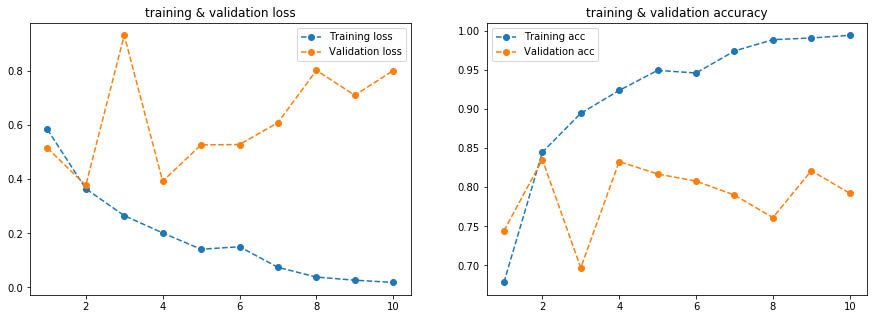

In [8]:
# ploting model training results
utility_obj.plot_training_history(history.history)